In [1]:
!pip install tensorflow


In [2]:
#!pip install tensorflow-gpu


In [3]:
!pip install opencv-python


In [10]:
!pip install matplotlib


In [11]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


In [12]:
import os 


In [13]:
gpus =tf.config.experimental.list_physical_devices('CPU')

In [14]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [15]:
gpus =tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [16]:
import imghdr

In [17]:
data_dir ='data'
data_dir

'data'

In [18]:
image_exts =['jpeg','jpg','bmp','png']

In [19]:
image_exts[2]

'bmp'

In [20]:
#os.listdir(data_dir) ['.ipynb_checkpoints', 'dataset']

In [21]:
#for image_class in os.listdir(data_dir):
  #  for image in os.listdir(os.path.join(data_dir,image_class)):
       # print(image)

In [22]:
#img = cv2.imread(os.path.join('data','dataset','image_1.jpg'))

In [23]:
#img.shape

In [24]:
import matplotlib.pyplot as plt 

In [25]:
#plt.imshow(img)

In [26]:
 for  image_class in os.listdir(data_dir):
        for image in os.listdir(os.path.join(data_dir,image_class)):
            image_path =os.path.join(data_dir,image_class)
            try:
                img=cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('image not in ext list: {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image: {}'.format(image_path))
               # os.remove(image_path)

Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue with image: data\dataset
Issue wi

In [27]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue  # Skip non-directory entries
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        if os.path.isfile(image_path):  # Check if it's a file
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list: {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image: {}'.format(image_path))
                # Uncomment the line below to remove problematic images
                os.remove(image_path)

In [28]:
#tf.data.Dataset??

In [29]:
import numpy as np 
from matplotlib import pyplot as plt 

In [30]:
#tf.keras.utils.image_dataset_from_directory??

In [31]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 442 files belonging to 2 classes.


In [32]:
data_iterator =data.as_numpy_iterator()

In [33]:
data_iterator

In [34]:
batch =data_iterator.next()

In [35]:
#batch

In [36]:
batch[0].shape

(32, 256, 256, 3)

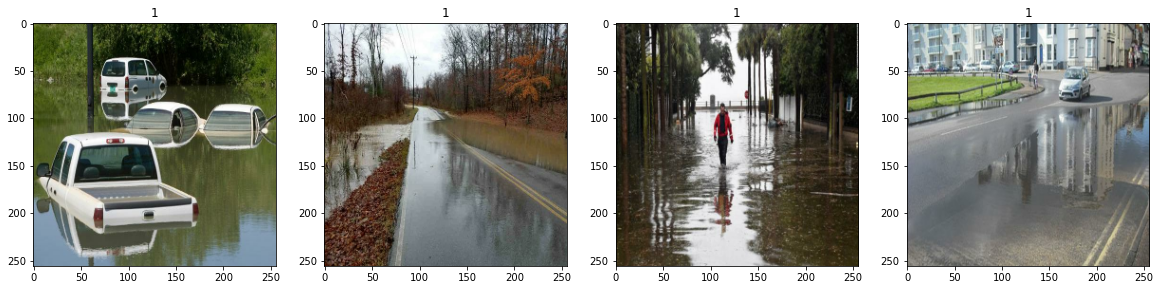

In [37]:
fig, ax =plt.subplots(ncols=4,figsize=(20,30))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [38]:
scaled =batch[0]/255

In [39]:
scaled.max()

1.0

Preprocessing Data 

In [40]:
data =data.map(lambda x,y:(x/255,y))

In [41]:
scaled_iterator = data.as_numpy_iterator()

In [42]:
batch =scaled_iterator.next()

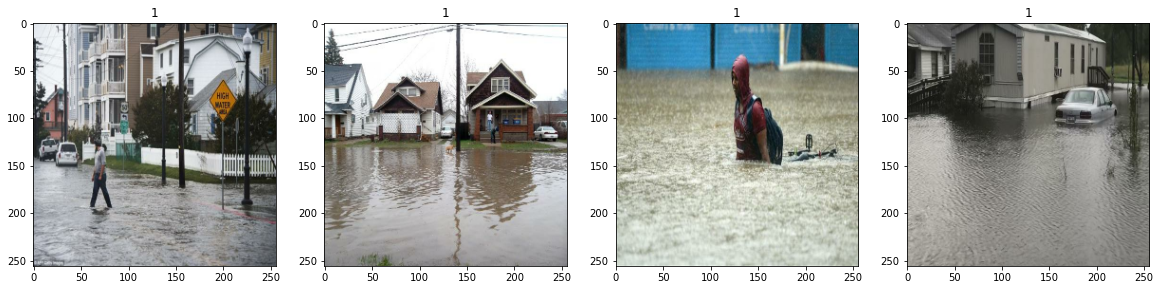

In [43]:
fig, ax =plt.subplots(ncols=4,figsize=(20,30))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [44]:
len(data)

14

In [45]:
train_size =int(len(data)*.7)
val_size =int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [46]:
train_size+val_size+test_size

14

In [47]:
train =data.take(train_size)
val =data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [48]:
len(test)

2

DEEP LEARNING MODEL

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [50]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation ='relu'))
model.add(Dense(1, activation='sigmoid'))



In [51]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

# Flatten the output for the fully connected layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [52]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

TRAIN 


In [54]:
logdir='logs'

In [55]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist =model.fit(train,epochs=20,validation_data =val,callbacks =[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 19s 2s/step - loss: 0.1016 - accuracy: 0.8889 - val_loss: 1.7916e-07 - val_accuracy: 1.0000
Epoch 2/20
9/9 [==============================] - 12s 1s/step - loss: 5.9997e-08 - accuracy: 1.0000 - val_loss: 2.2034e-08 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 11s 1s/step - loss: 1.4053e-08 - accuracy: 1.0000 - val_loss: 3.8888e-09 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 12s 1s/step - loss: 8.5549e-09 - accuracy: 1.0000 - val_loss: 1.0163e-08 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 12s 1s/step - loss: 7.0561e-09 - accuracy: 1.0000 - val_loss: 2.4207e-09 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 12s 1s/step - loss: 4.9543e-09 - accuracy: 1.0000 - val_loss: 2.0885e-09 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 12s 1s/step - loss: 4.7015e-09 - accuracy: 1.0000 - val_loss: 3.8074e-09 - val

plot performance

In [57]:
hist.history

{'loss': [0.10159724950790405,
  5.99966298864274e-08,
  1.4053051167195463e-08,
  8.554947861227902e-09,
  7.056139228467373e-09,
  4.9542547841952e-09,
  4.701468103718298e-09,
  3.0762628000502446e-09,
  3.6314402596104856e-09,
  3.2381028969297176e-09,
  3.3455940240401105e-09,
  3.3099842866590734e-09,
  3.9283847286242235e-09,
  3.364690304152873e-09,
  3.925459068909731e-09,
  2.9218591990343157e-09,
  2.5760542587960344e-09,
  3.2366993529819865e-09,
  2.3813553351459404e-09,
  2.139873167550377e-09],
 'accuracy': [0.8888888955116272,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.791552648455763e-07,
  2.203371529674314e-08,
  3.888751098912735e-09,
  1.0162589880735595e-08,
  2.420650790924128e-09,
  2.088541117828413e-09,
  3.807377080278229e-09,
  7.342119801023728e-09,
  8.691638520019751e-09,
  5.157696048030402e-09,
  1.018256856610833e-08,
  9.122148370011018e-09,
  1.

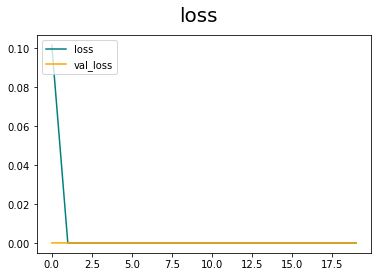

In [58]:
fig =plt.figure()
plt.plot(hist.history['loss'],color='teal', label ='loss')
plt.plot(hist.history['val_loss'],color='orange', label ='val_loss')
fig.suptitle('loss',fontsize =20)
plt.legend(loc="upper left")
plt.show()           


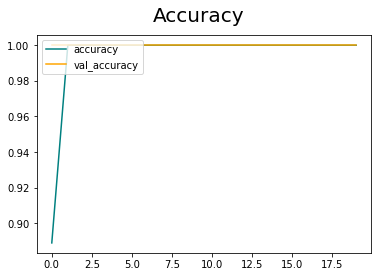

In [59]:
fig =plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label ='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label ='val_accuracy')
fig.suptitle('Accuracy',fontsize =20)
plt.legend(loc="upper left")
plt.show()           


Evaluate   Performance

In [60]:
from tensorflow.keras.metrics import Precision,Recall, BinaryAccuracy

In [61]:
pre =Precision()
re = Recall()
acc = BinaryAccuracy()


In [62]:
for batch in test.as_numpy_iterator():
    X,y =batch
    yhat =model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 422ms/step


In [63]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


TEST

In [64]:
import cv2

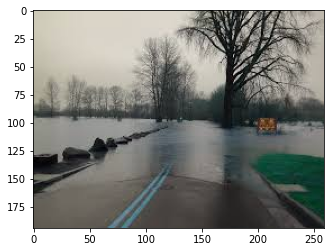

In [65]:
img =cv2.imread('floodimage3.jpg')
plt.imshow(img)
plt.show()

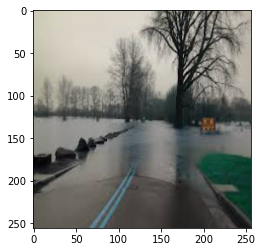

In [66]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
np.expand_dims(resize,0)

array([[[[206.      , 202.      , 184.      ],
         [206.      , 202.      , 184.      ],
         [206.      , 202.      , 184.      ],
         ...,
         [189.9414  , 183.9414  , 172.9414  ],
         [190.      , 184.      , 171.03516 ],
         [190.      , 184.      , 171.      ]],

        [[206.      , 202.      , 184.      ],
         [206.      , 202.      , 184.      ],
         [206.      , 202.      , 184.      ],
         ...,
         [189.9414  , 183.9414  , 172.9414  ],
         [190.      , 184.      , 171.03516 ],
         [190.      , 184.      , 171.      ]],

        [[206.      , 202.      , 184.      ],
         [206.      , 202.      , 184.      ],
         [206.      , 202.      , 184.      ],
         ...,
         [189.95297 , 183.95297 , 172.95297 ],
         [190.      , 184.      , 171.03516 ],
         [190.      , 184.      , 171.      ]],

        ...,

        [[ 93.40039 ,  88.40039 ,  79.40039 ],
         [ 94.39453 ,  89.39453 ,  80.39453 ]

In [68]:
yhat =model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 63ms/step


In [69]:
yhat

array([[1.]], dtype=float32)

In [70]:
if yhat >0.5:
    print(f'Predicted class is flood -related')
else:
    print(f'Predicted class in other')

Predicted class is flood -related


Save the model


In [71]:
from tensorflow.keras.models import load_model

In [75]:
model.save(os.path.join('models','waterproblems.h5'))

In [76]:
new_model = load_model(os.path.join('models','waterproblems.h5'))

In [77]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 155ms/step


array([[1.]], dtype=float32)

In [1]:
%pwd


'C:\\Users\\Mehta'

In [2]:
!pwd


'pwd' is not recognized as an internal or external command,
operable program or batch file.
